In [547]:
import pandas as pd
#Загружаем файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [449]:
#Рассчитываем основные статистики для переменных(среднее,медиана,мин/макс,сред.отклонение).
df_stat_basics = df[['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company']]
df_stat_basics.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [454]:
#Мода
df_stat_basics.mode()

for x in df_stat_basics:
    Moda =df_stat_basics[x].mode()
    print(x, f' Мода: {Moda[0]}')

satisfaction_level  Мода: 0.1
last_evaluation  Мода: 0.55
number_project  Мода: 4
average_montly_hours  Мода: 135
time_spend_company  Мода: 3


2 Самые скоррелированные переменные average_montly_hours & number_project. 2 Наименее скоррелированные переменные satisfaction_level & number_project.


<AxesSubplot:>

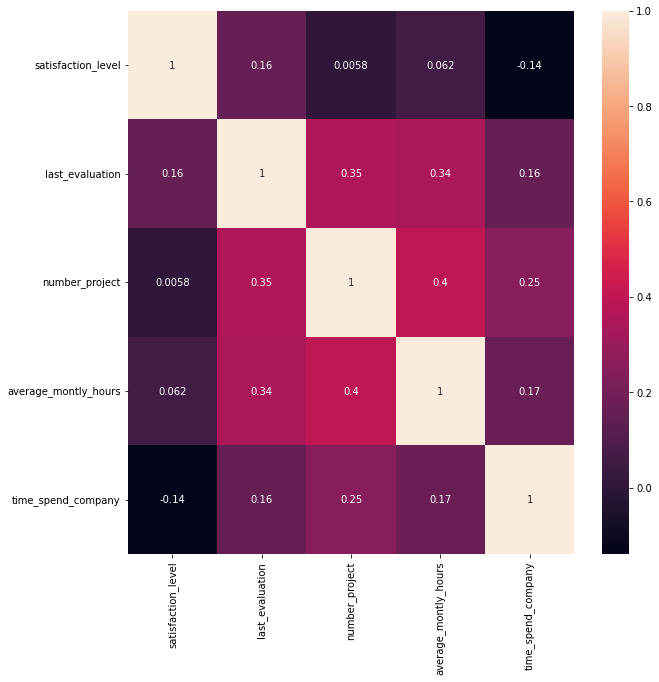

In [457]:
#Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
#Определите две самые скоррелированные и две наименее скоррелированные переменные.

print('2 Самые скоррелированные переменные average_montly_hours & number_project. 2 Наименее скоррелированные переменные satisfaction_level & number_project.')
plt.figure(figsize=(10,10))
sns.heatmap(data=df_stat_basics.corr(method='spearman'),annot=True)

In [464]:
#Рассчитайте сколько сотрудников работает в каждом департаменте.

df[['department','left']].groupby('department').count()

,left
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

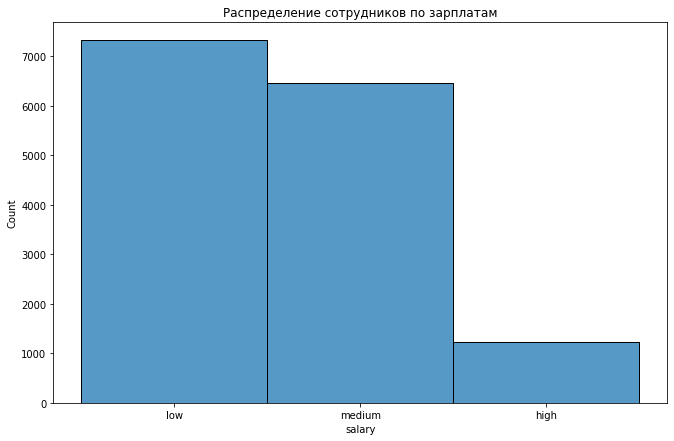

In [439]:
#Показать распределение сотрудников по зарплатам.
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 11,7
sns.histplot(df['salary'])
plt.title('Распределение сотрудников по зарплатам')

<AxesSubplot:xlabel='department', ylabel='Count'>

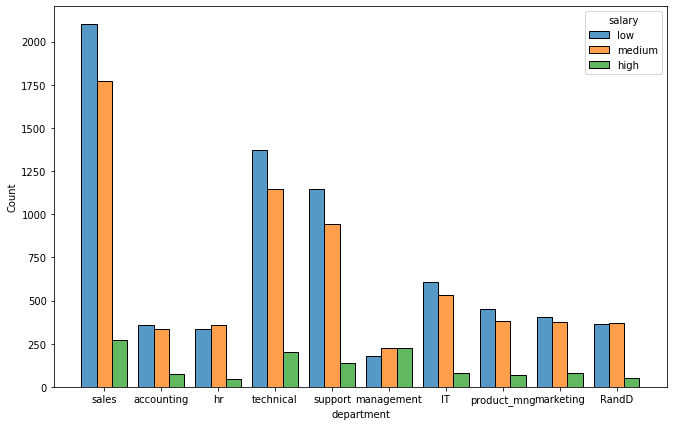

In [465]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
sns.histplot(df, x="department", hue="salary", multiple="dodge", shrink=.8)

In [473]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

m_h_all = df[df.salary=='high']['average_montly_hours'].median()
m_m_all = df[df.salary=='medium']['average_montly_hours'].median()
m_l_all = df[df.salary=='low']['average_montly_hours'].median()

print(f'Для проверки гипотезы используем медианное значение выборки с разбивкой по относительному уровню заработной платы. Для уровня high получаем значение {m_h_all}, medium {m_m_all}, low {m_l_all}. Для всей выборки гипотеза не подтверждается. Проверим результат только на действующих сотрудниках.')

m_h_nl = df[df.salary=='high'][df.left==0]['average_montly_hours'].median()
m_m_nl = df[df.salary=='medium'][df.left==0]['average_montly_hours'].median()
m_l_nl = df[df.salary=='low'][df.left==0]['average_montly_hours'].median()

print(f'Для уровня high получаем значение {m_h_nl}, medium {m_m_nl}, low {m_l_nl}. Для действующего персонала гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом подтверждается.')

Для проверки гипотезы используем медианное значение выборки с разбивкой по относительному уровню заработной платы. Для уровня high получаем значение 199.0, medium 201.0, low 199.0. Для всей выборки гипотеза не подтверждается. Проверим результат только на действующих сотрудниках.
Для уровня high получаем значение 201.0, medium 199.0, low 197.0. Для действующего персонала гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом подтверждается.


/tmp/ipykernel_99427/4147636383.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m_h_nl = df[df.salary=='high'][df.left==0]['average_montly_hours'].median()
/tmp/ipykernel_99427/4147636383.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m_m_nl = df[df.salary=='medium'][df.left==0]['average_montly_hours'].median()
/tmp/ipykernel_99427/4147636383.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  m_l_nl = df[df.salary=='low'][df.left==0]['average_montly_hours'].median()


In [471]:
#Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет
# Средняя степень удовлетворенности
# Среднее количество проектов

#Среди действующих
nl_pl = round((data[data.left==0]['promotion_last_5years'].sum()/data[data.left==0]['promotion_last_5years'].count())*100,2)
nl_sl = round(data[data.left==0]['satisfaction_level'].mean(),2)
nl_np = round(data[data.left==0]['number_project'].mean(),2)
print(f'Расчет для действующих сотрудников. Доля сотрудников с повышением за последние 5 лет {nl_pl}%, средняя степень удовлетворенности {nl_sl}, среднее количество проектов {nl_np}.')

#Среди уволенных
l_pl = round((data[data.left==1]['promotion_last_5years'].sum()/data[data.left==1]['promotion_last_5years'].count())*100,2)
l_sl = round(data[data.left==1]['satisfaction_level'].mean(),2)
l_np = round(data[data.left==1]['number_project'].mean(),2)
print(f'Расчет для уволенных сотрудников. Доля сотрудников с повышением за последние 5 лет {l_pl}%, средняя степень удовлетворенности {l_sl}, среднее количество проектов {l_np}.')

Расчет для действующих сотрудников. Доля сотрудников с повышением за последние 5 лет 2.63%, средняя степень удовлетворенности 0.67, среднее количество проектов 3.79.
Расчет для уволенных сотрудников. Доля сотрудников с повышением за последние 5 лет 0.53%, средняя степень удовлетворенности 0.44, среднее количество проектов 3.86.


In [288]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

In [551]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [552]:
df_lda=df[['satisfaction_level','last_evaluation', 'number_project','average_montly_hours','time_spend_company', 'Work_accident', 'promotion_last_5years']]

In [553]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, df['left'], test_size=0.25, random_state=42)

In [554]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [568]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [569]:
from sklearn.metrics import classification_report

report = classification_report(y_test, lda.predict(X_test), target_names=['Non-left', 'left'])
print(report)

              precision    recall  f1-score   support

    Non-left       0.79      0.91      0.85      2853
        left       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



In [572]:
from sklearn.metrics import confusion_matrix


y_train = lda.predict(X_test)

results = confusion_matrix(y_test, y_train)

results 

array([[2605,  248],
       [ 676,  221]])